In [1]:
from google_images_download import google_images_download

In [2]:
from fastai.vision import *
from fastai.vision import *

In [19]:
folder = 'Arabe'
file = 'urls_Arabe.txt'

In [22]:
folder = 'Frison'
file = 'urls_Frison.txt'

In [25]:
folder = 'Mustang'
file = 'urls_Mustang.txt'

In [28]:
folder = 'Andalou'
file = 'urls_Andalou.txt'

In [31]:
folder = 'Pur-sang'
file = 'urls_Pur-sang.txt'

In [34]:
folder = 'Shetland'
file = 'urls_Shetland.txt'

In [9]:
pwd

'/home/msafariamin'

Run this one for each classes. by one by

In [35]:
path = Path('data/horses')  
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
path.ls()

[PosixPath('data/horses/Arabe'), PosixPath('data/horses/Shetland')]

In [12]:
path

PosixPath('data/horses')

In [13]:
ls data/bears/

black/       export.pkl  models/  urls_black.txt    urls_teddys.txt
cleaned.csv  grizzly/    teddys/  urls_grizzly.txt


In [14]:
classes = ['Arabe','Frison','Mustang','Andalou','Pur-sang','Shetland']
classes

['Arabe', 'Frison', 'Mustang', 'Andalou', 'Pur-sang', 'Shetland']

In [15]:
path

PosixPath('data/horses')

Download from file: to copy this line in your JavaScript Console.

In [14]:
#javascript:document.body.innerHTML = `<a href="data:text/csv;charset=utf-8,${escape(Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou).join('\n'))}" download="links.txt">download urls</a>`;

In [36]:
download_images(path/file, dest, max_pics=200)

In [17]:
## If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=20, max_workers=0)

In [37]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [38]:
classes

['Arabe', 'Frison', 'Mustang', 'Andalou', 'Pur-sang', 'Shetland']

View data

In [39]:
import numpy as np

In [40]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [22]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [41]:
data.classes

['Andalou', 'Arabe', 'Frison', 'Mustang', 'Pur-sang', 'Shetland']

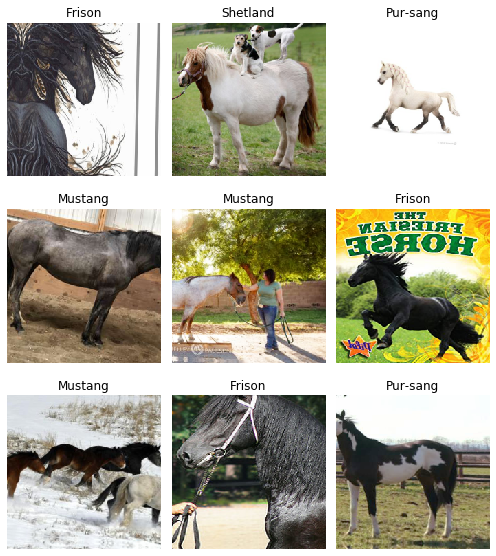

In [42]:
data.show_batch(rows=3, figsize=(7,8))

data.c is the attribute which the classifiers tell us how many possible labels there are. We'll learn about some other more specific meanings of c later. We can see how many things are now training set, how many things are in validation set. 

In [43]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Andalou', 'Arabe', 'Frison', 'Mustang', 'Pur-sang', 'Shetland'],
 6,
 891,
 222)

Train model

In [44]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/home/msafariamin/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [45]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.453818,1.249389,0.459459,00:17
1,1.959192,1.233401,0.432432,00:06
2,1.649368,1.216814,0.427928,00:06
3,1.409126,1.199611,0.427928,00:06


In [46]:
learn.save('stage-1')

In [47]:
# we unfreeze the rest of our model.
learn.unfreeze()

In [48]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


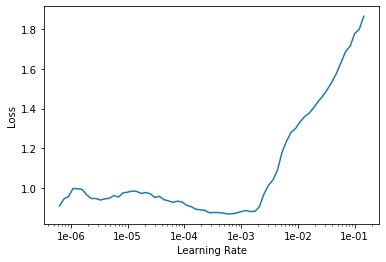

In [49]:
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.914074,1.277285,0.418919,00:06
1,0.806042,1.228504,0.409910,00:06


In [51]:
learn.save('stage-2')

Interpretation

In [52]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (891 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Pur-sang,Pur-sang,Pur-sang,Pur-sang,Pur-sang
Path: data/horses;

Valid: LabelList (222 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Mustang,Pur-sang,Andalou,Shetland,Frison
Path: data/horses;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.

In [53]:
interp = ClassificationInterpretation.from_learner(learn)

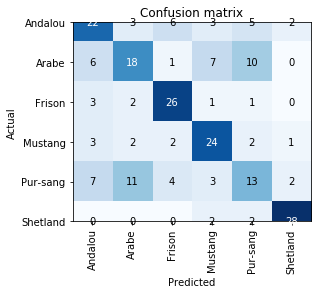

In [54]:
interp.plot_confusion_matrix()

Cleaning up

In [55]:
from fastai.widgets import *

#losses, indexes
losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [56]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)
# ImageRelabeler(ds, idxs)
# Only works when files where labels were created from the names 
# of their parent directory (i.e. with .from_folder())
# or

In [ ]:
#ImageDeleter(ds, idxs): il connait pas

In [41]:
#ImageDeleter(file_paths=top_loss_paths): il connait pas

In [ ]:
# fd = FileDeleter(file_paths=top_loss_paths)

In [57]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )


Then we create a new learner to use our new databunch with all the images.

In [58]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [59]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [60]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [61]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [62]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Putting your model in production¶

In [63]:
learn.export()
# create a file named 'export.pkl'

In [64]:
defaults.device = torch.device('cpu')

In [2]:
img = open_image(path/'Frison'/'00000021.jpg')
img

NameError: name 'open_image' is not defined

In [67]:
learn = load_learner(path)

In [68]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Arabe

Learning rate (LR) too high

In [69]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [70]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,29.525768,2647685.000000,0.851351,00:06


Learning rate (LR) too low¶

In [71]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [72]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,3.053988,2.160555,0.783784,00:06
1,3.020760,2.172394,0.797297,00:06
2,2.975598,2.162536,0.797297,00:07
3,2.976434,2.158040,0.797297,00:06
4,2.940297,2.146992,0.806306,00:06


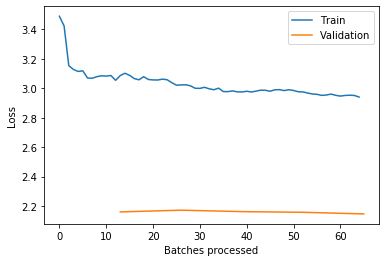

In [73]:
learn.recorder.plot_losses()

Too few epochs¶

In [74]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [75]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.803709,1.892365,0.783784,00:06


Too many epochs

In [76]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [77]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [81]:
learn.fit_one_cycle(100, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.024940,1.687781,0.523477,00:05
1,0.020790,1.689665,0.523477,00:05
2,0.025350,1.683492,0.529471,00:05
3,0.022251,1.678100,0.523477,00:06
4,0.023177,1.676119,0.520480,00:05
5,0.022044,1.677559,0.520480,00:05
6,0.020494,1.680187,0.522478,00:05
7,0.020712,1.678313,0.527473,00:06
8,0.019997,1.684790,0.527473,00:05
9,0.020460,1.683991,0.530470,00:05
